# Importing all the dependencies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import joblib
import streamlit as st

# Import the dataset

In [44]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
data = df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [43]:
data = df.tail()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38


# Exploratory Data Analysis (EDA)

### Understand the distribution, relationship and trends

In [48]:
 data = df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


In [47]:
 data = df.describe(include="object")

,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


In [38]:
data = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    float64
 1   Weight (kg)                    973 non-null    float64
 2   Height (m)                     973 non-null    float64
 3   Max_BPM                        973 non-null    float64
 4   Avg_BPM                        973 non-null    float64
 5   Resting_BPM                    973 non-null    float64
 6   Session_Duration (hours)       973 non-null    float64
 7   Calories_Burned                973 non-null    float64
 8   Fat_Percentage                 973 non-null    float64
 9   Water_Intake (liters)          973 non-null    float64
 10  Workout_Frequency (days/week)  973 non-null    float64
 11  Experience_Level               973 non-null    float64
 12  BMI                            973 non-null    flo

In [85]:
for col in df.columns:
    print(col, len(df[col].unique()) , df[col].unique())

Age 42 [56 46 32 25 38 36 40 28 41 53 57 20 39 19 47 55 50 29 42 44 59 45 33 54
 24 26 35 21 31 43 37 52 34 23 51 27 48 58 18 22 30 49]
Gender 2 ['Male' 'Female']
Weight (kg) 532 [ 88.3  74.9  68.1  53.2  46.1  58.   70.3  69.7 121.7 101.8 120.8  51.7
 112.5  94.5 117.7  42.5  64.   43.8  66.8  75.2  89.   71.9  71.  120.9
  64.3  63.7  65.2  53.9  84.9  78.  108.2  65.4  50.2  58.9  81.4 127.6
  59.3  96.9  62.6  45.5  48.8  44.3 113.2  60.5 124.2  52.4  54.7  88.1
  59.7  79.7  51.   84.2 122.1  96.7  73.  114.8  65.5  50.3  61.   44.6
  58.2  44.8  87.5  51.8  64.4  67.1  85.9  61.1 106.5  61.4  40.5  70.1
  94.1  55.5  53.7  66.1 103.9  61.7  52.3  59.5  72.9  76.7  72.1  54.8
 105.   55.   81.6  75.6  81.5  61.5  74.   56.4 102.6  54.6 129.  103.5
  59.4  60.1  77.7  41.2  58.6 109.3  69.6  56.2  71.7  86.   79.4  78.4
  55.4  85.5  87.6  82.4  67.   42.3  82.7  92.4  63.2  86.6 129.5  98.
  86.2  78.6  59.   57.3 122.3  85.3  45.2  55.6  82.8 125.2  58.5  86.1
  63.5  69.3  70.5 

In [36]:
data = df.dtypes

### Visualize the dataset using charts and plots

- unvarient analysis for numerical analysis

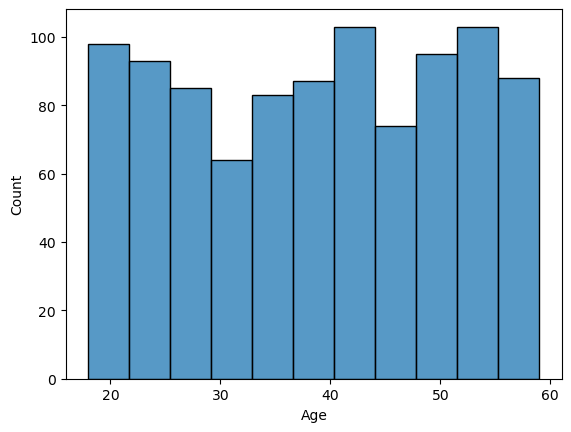

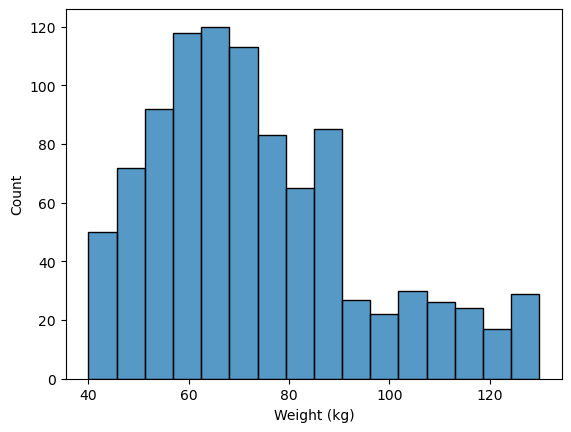

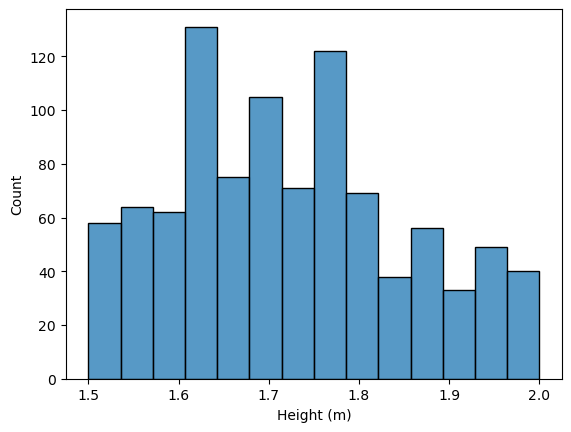

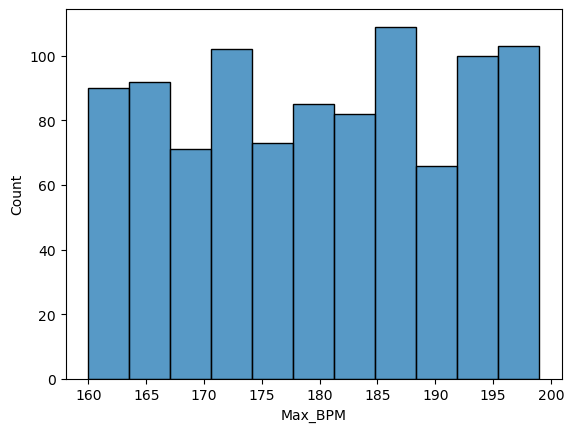

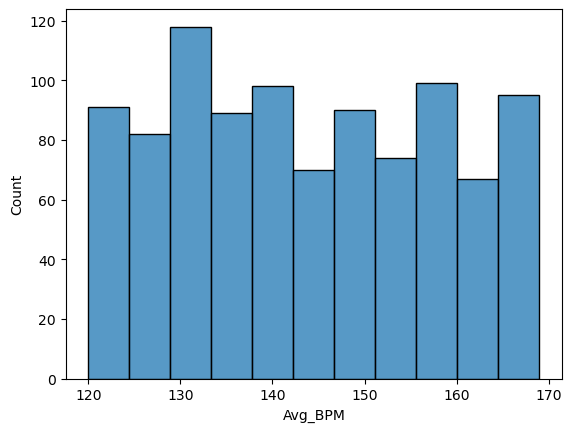

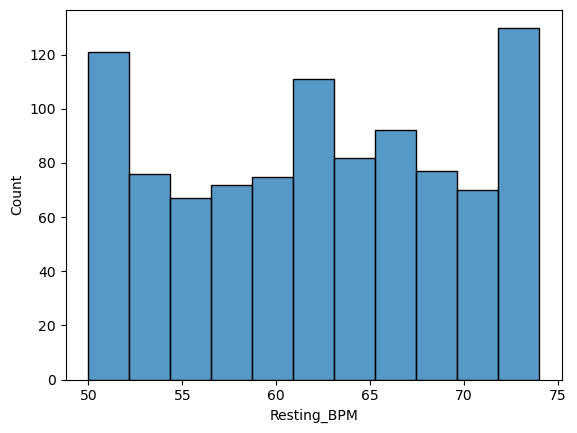

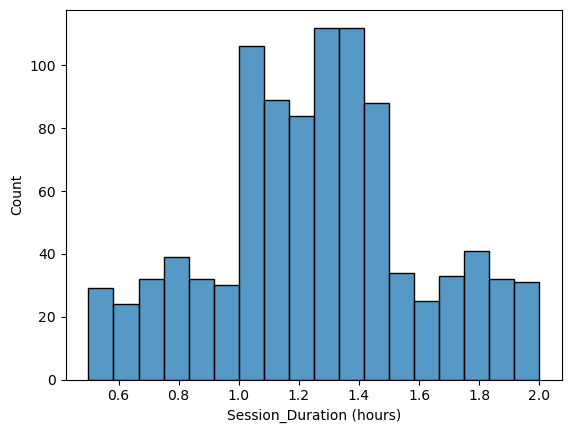

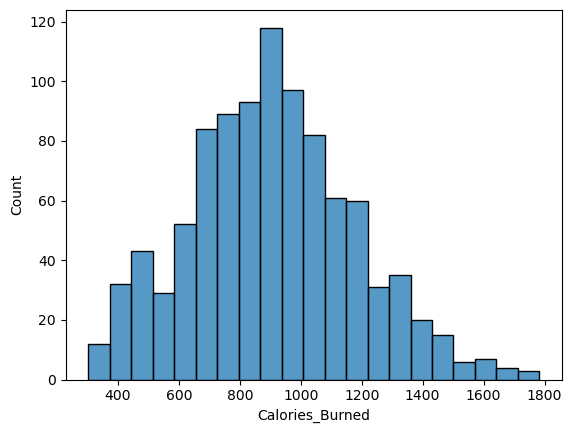

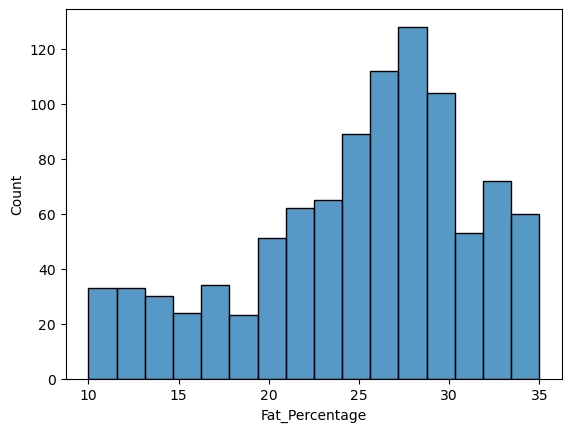

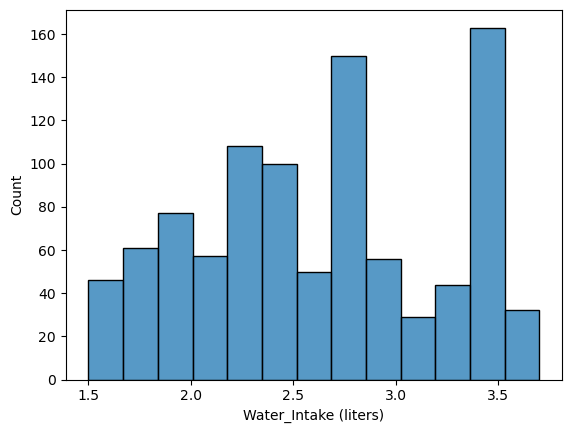

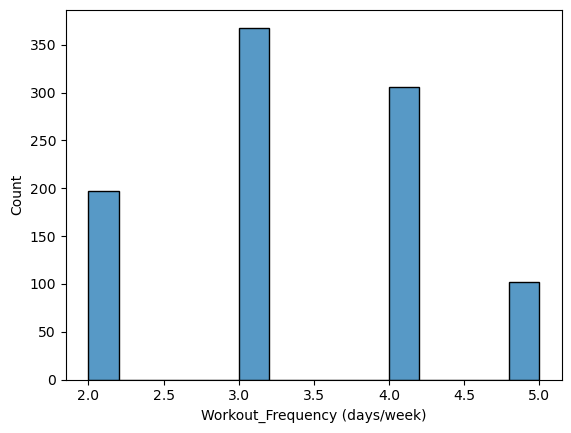

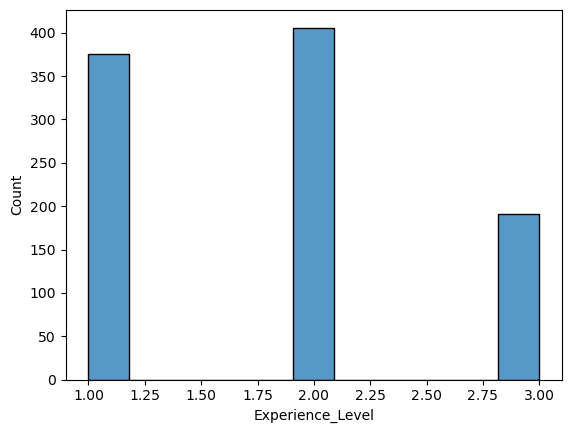

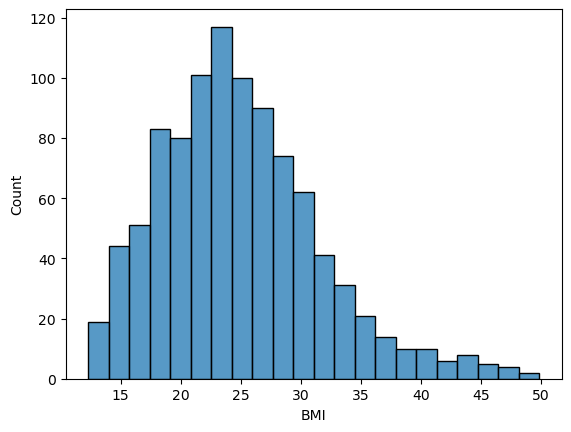

In [91]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

- unvarient analysis for categorical analysis

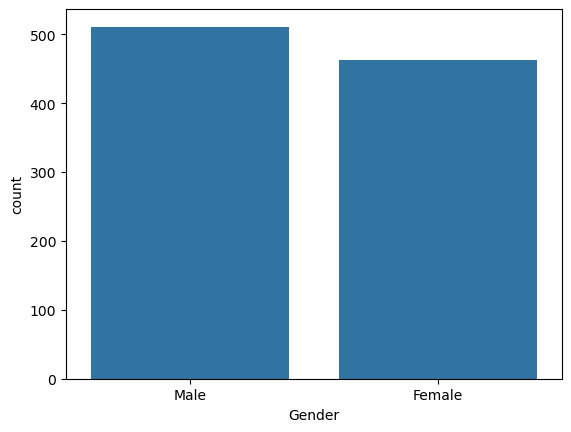

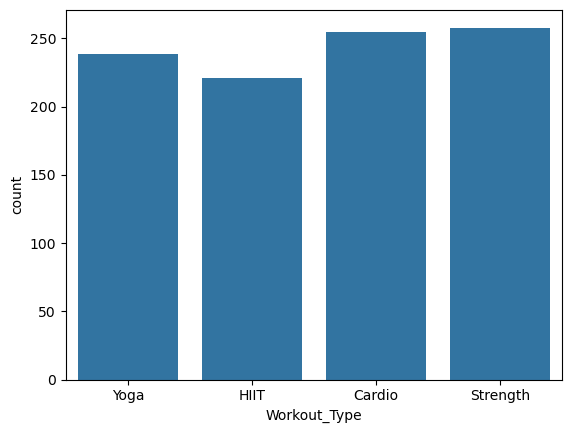

In [89]:
for i in df.select_dtypes(include="object").columns:
    sns.countplot(data=df,x=i)
    plt.show()

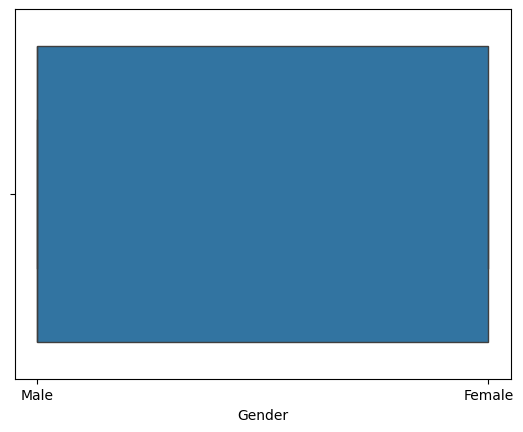

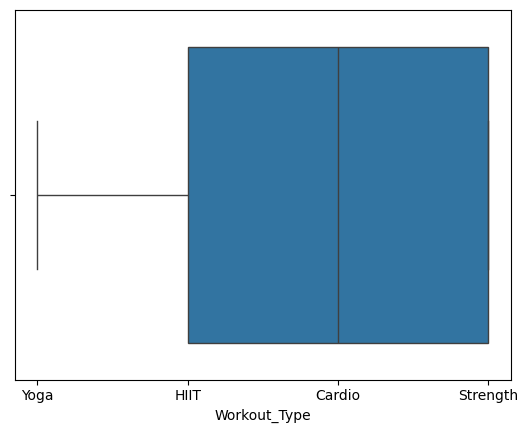

In [94]:
for i in df.select_dtypes(include="object").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

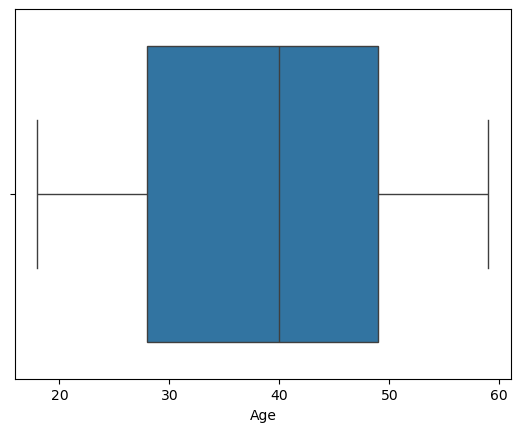

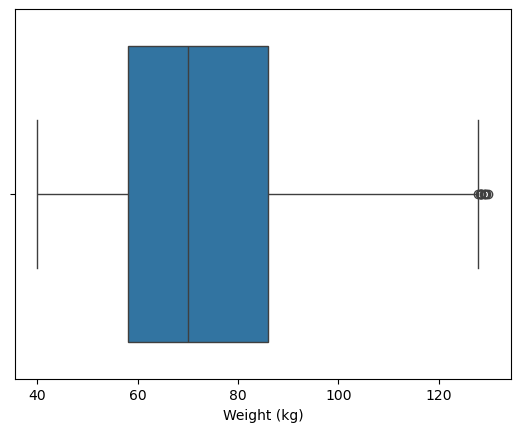

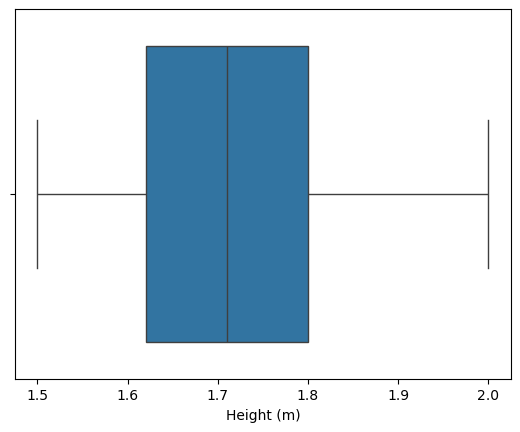

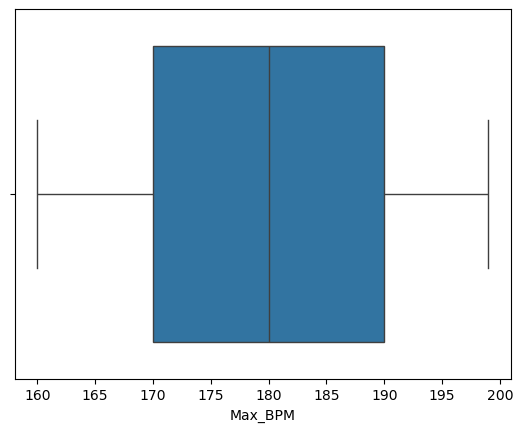

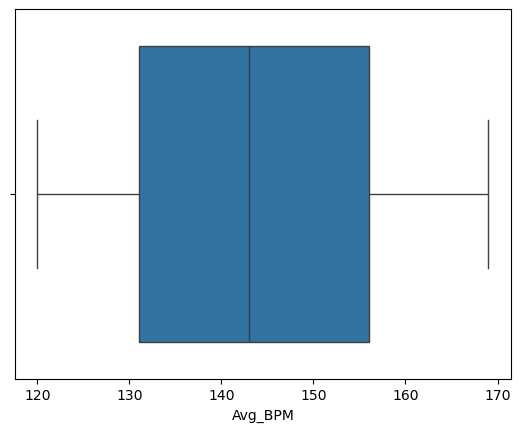

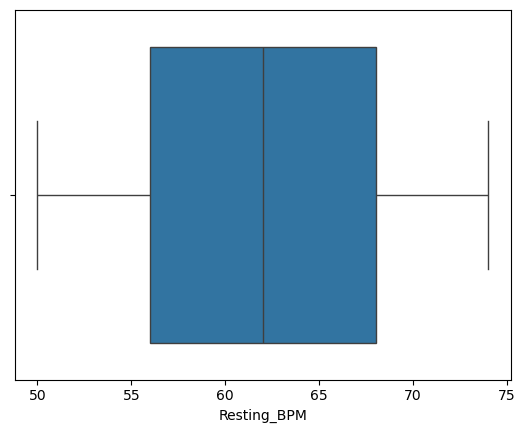

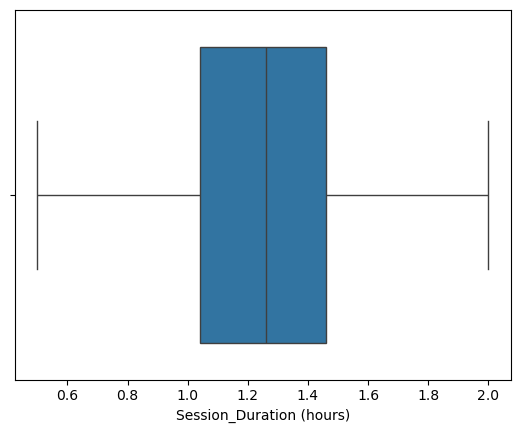

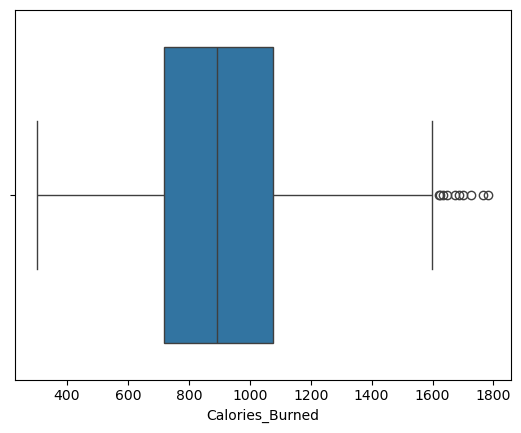

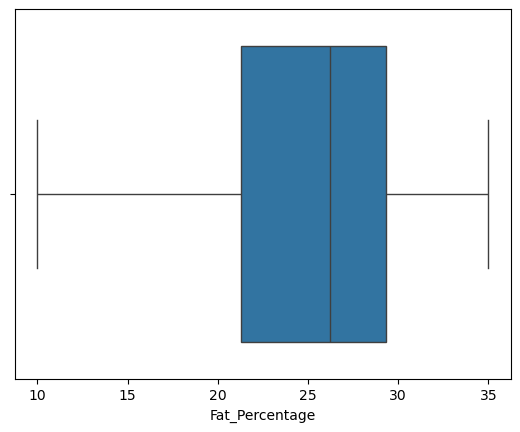

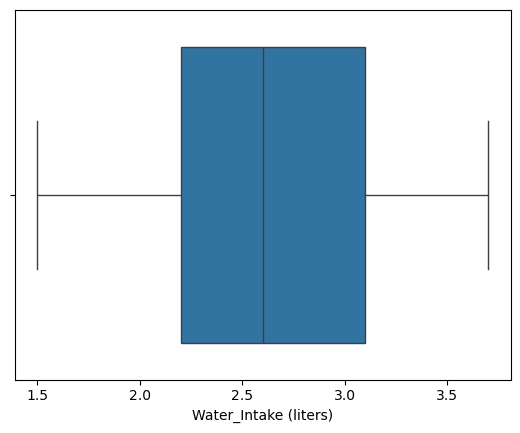

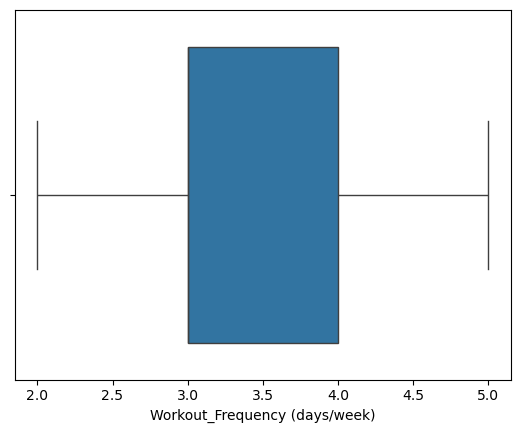

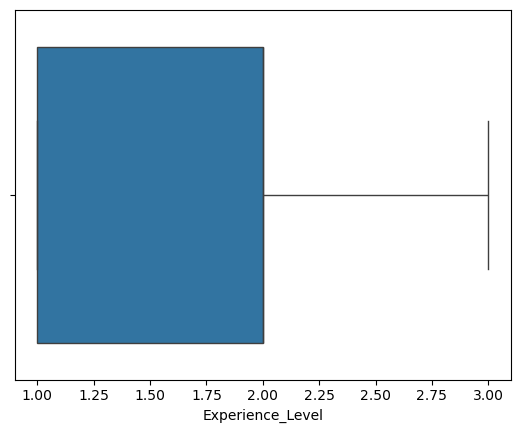

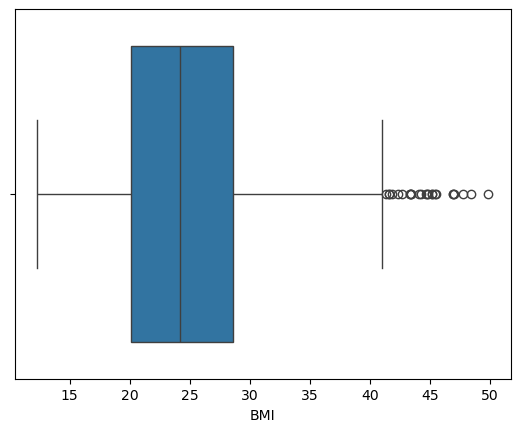

In [95]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

- bivariant for numerical vs numerical (correlation matrix heatmap or scatter plot)

In [96]:
df.select_dtypes(include="number").columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI'],
      dtype='object')

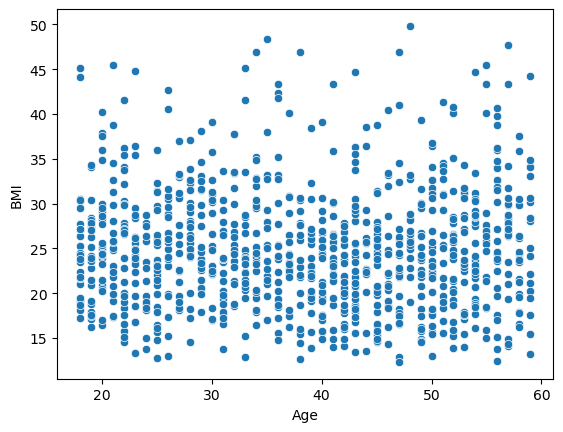

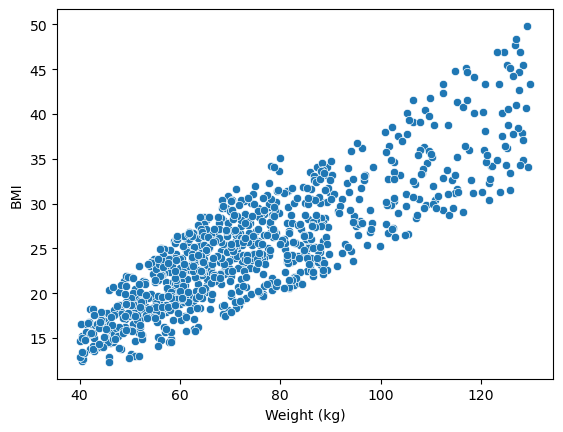

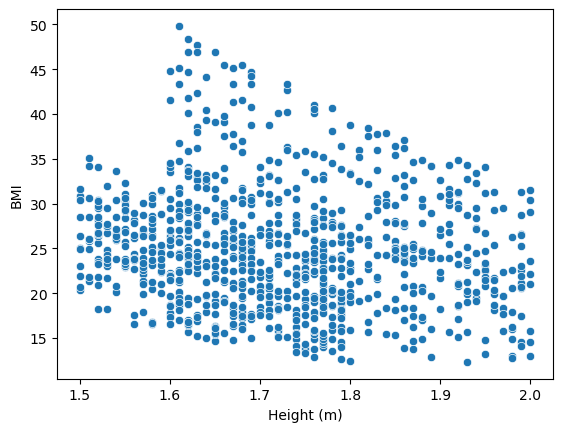

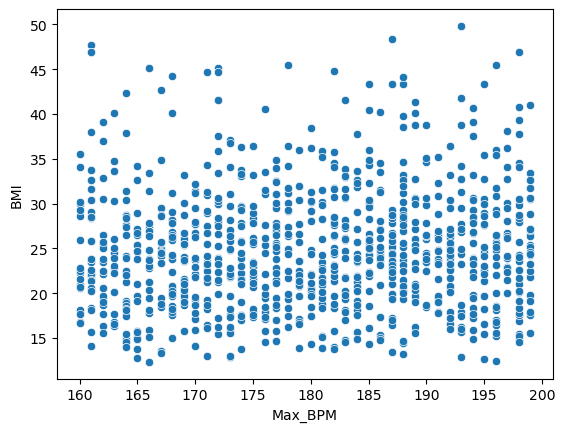

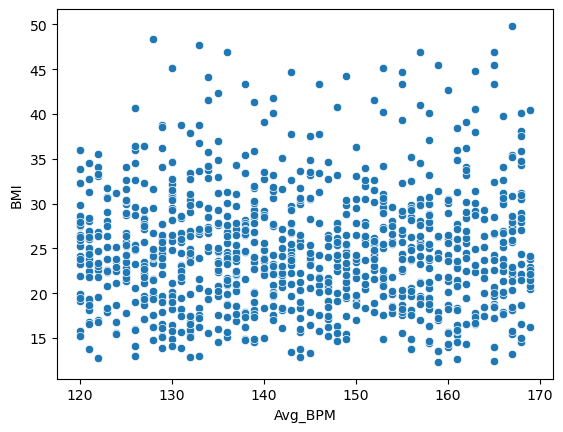

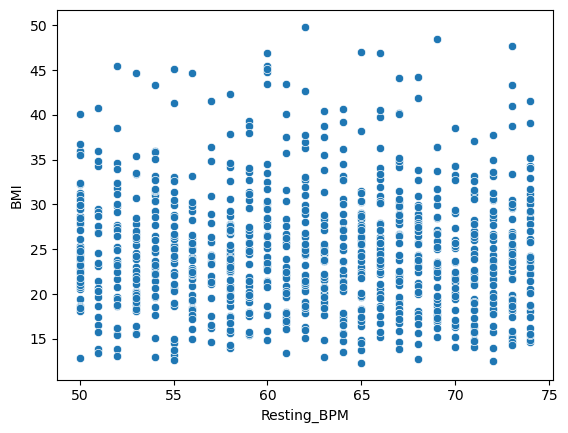

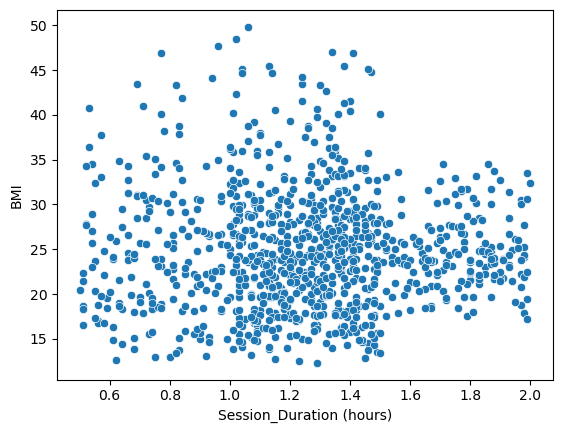

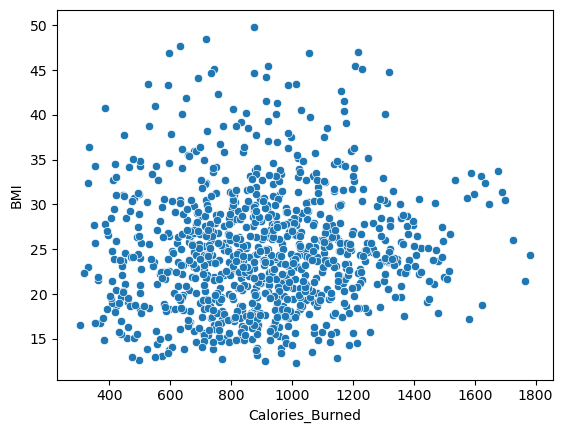

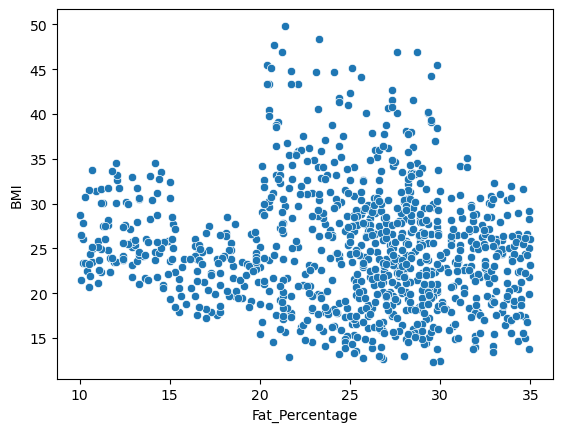

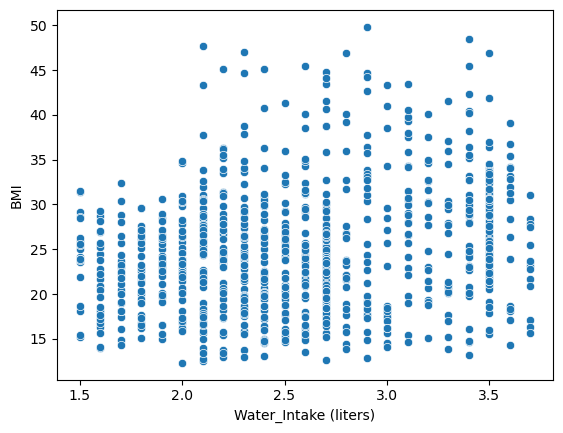

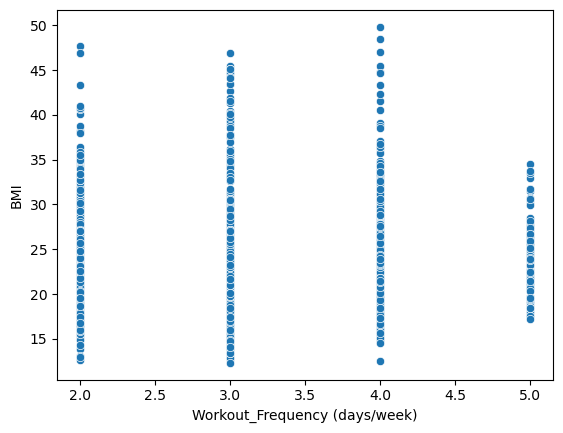

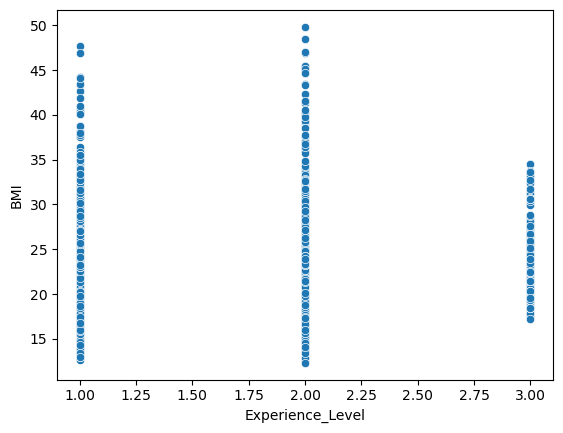

In [97]:
for i in ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level']:
    sns.scatterplot(data=df,x=i,y='BMI')
    plt.show()

In [99]:
df_corr = df.select_dtypes(include="number").corr()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.694129,0.059761
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,-0.119258
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.304104,0.213697


<Axes: >

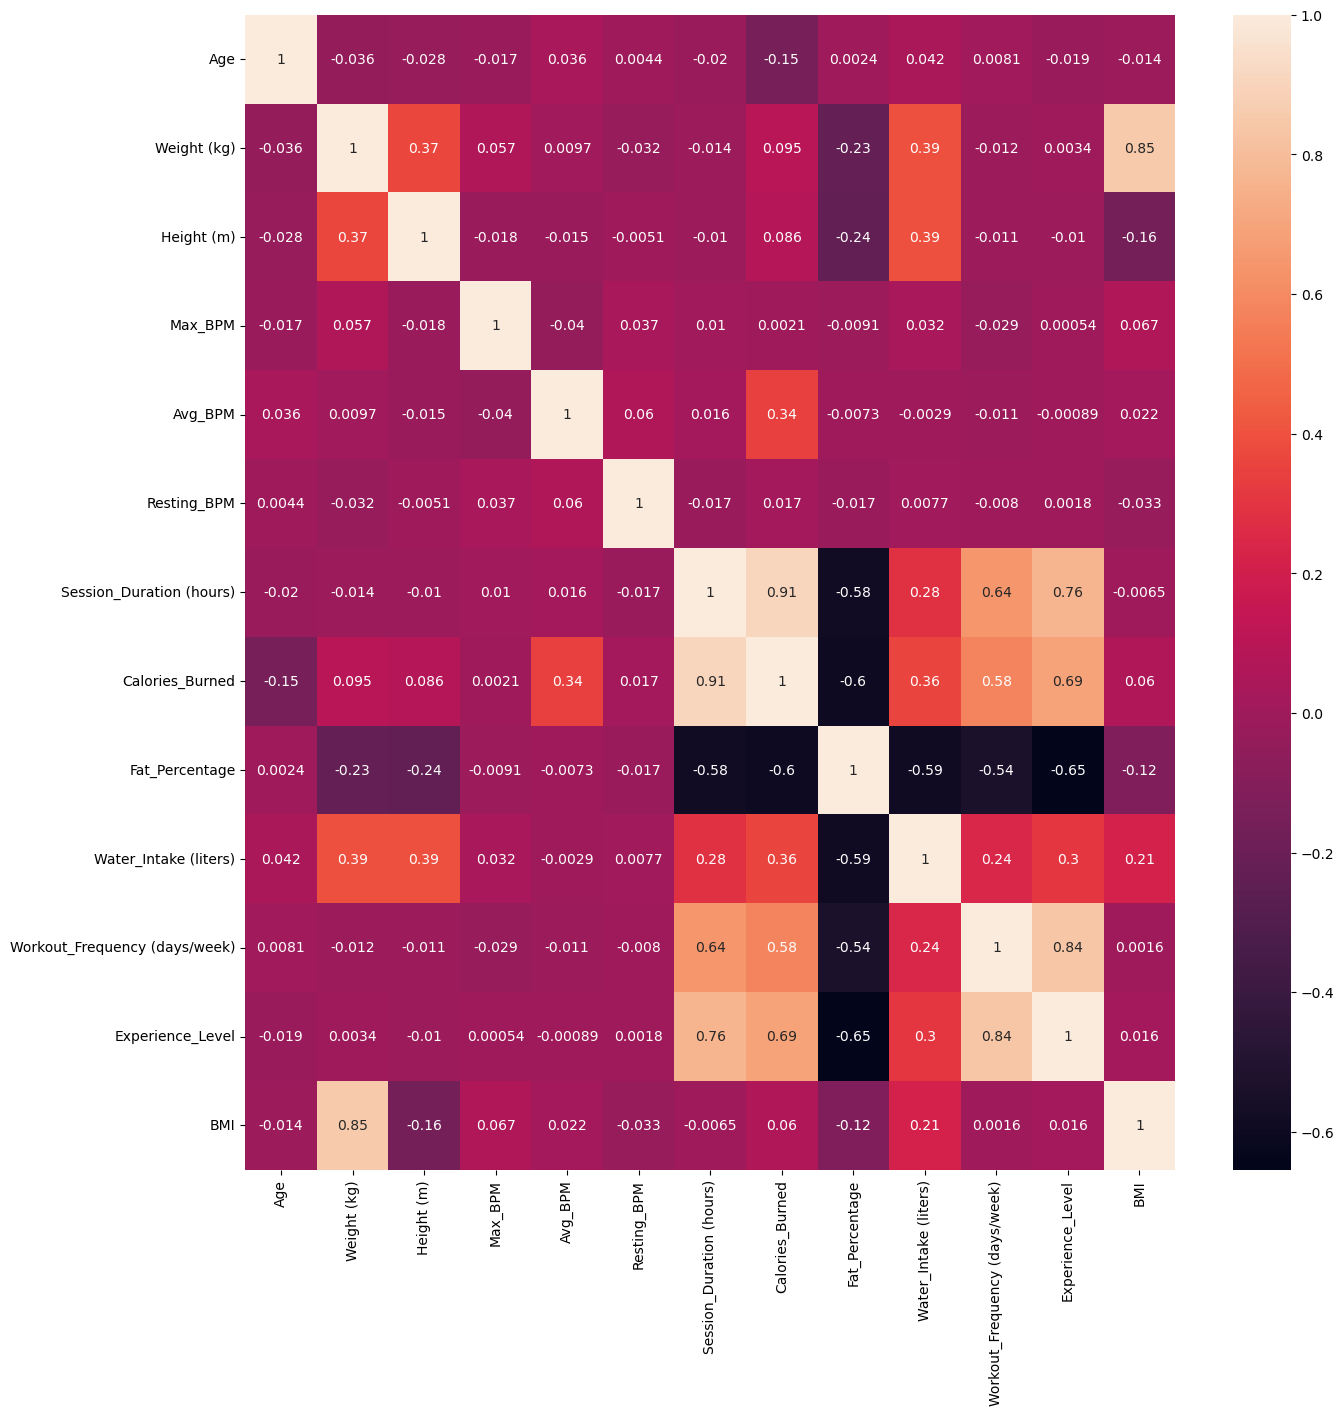

In [105]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True)

# Data Cleaning

In [107]:
data_shape = df.shape

(973, 15)

In [108]:
data = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

- handle missing values

In [110]:
data = df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [111]:
data = df.isnull().sum()/df.shape[0]*100

Age                              0.0
Gender                           0.0
Weight (kg)                      0.0
Height (m)                       0.0
Max_BPM                          0.0
Avg_BPM                          0.0
Resting_BPM                      0.0
Session_Duration (hours)         0.0
Calories_Burned                  0.0
Workout_Type                     0.0
Fat_Percentage                   0.0
Water_Intake (liters)            0.0
Workout_Frequency (days/week)    0.0
Experience_Level                 0.0
BMI                              0.0
dtype: float64

- handle duplicates

In [113]:
data = df.duplicated().sum()

0

- Find garbage values

In [114]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Gender
Male      511
Female    462
Name: count, dtype: int64
******************************
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64
******************************


- address outliers and dependecies

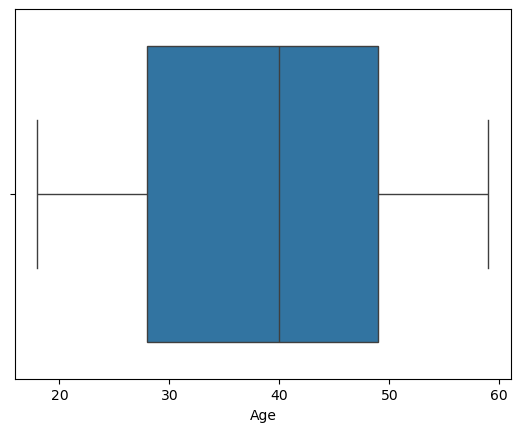

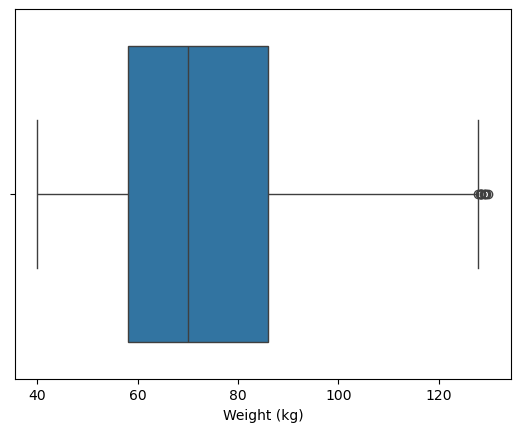

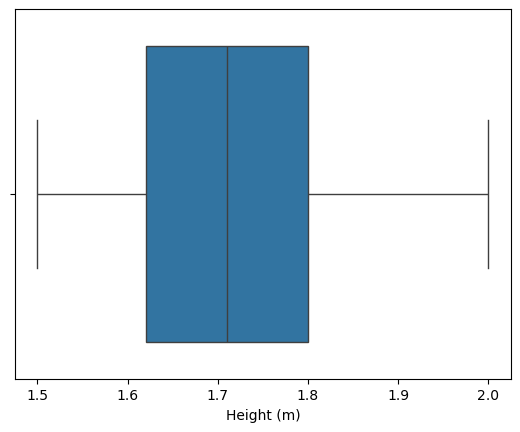

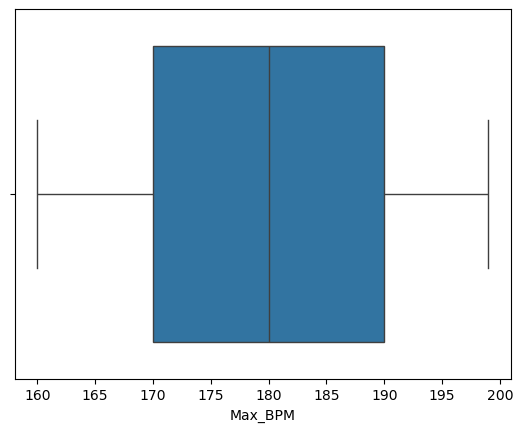

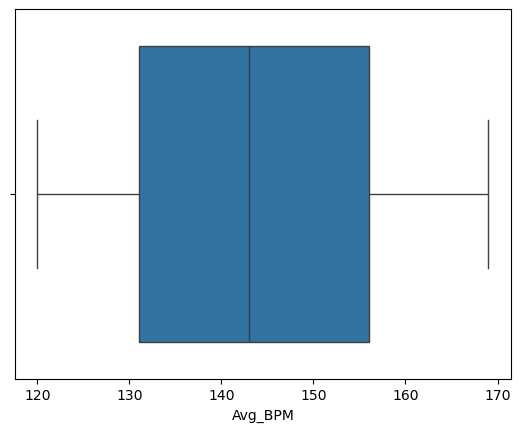

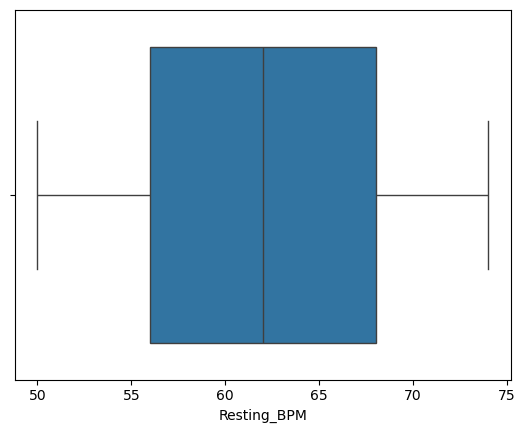

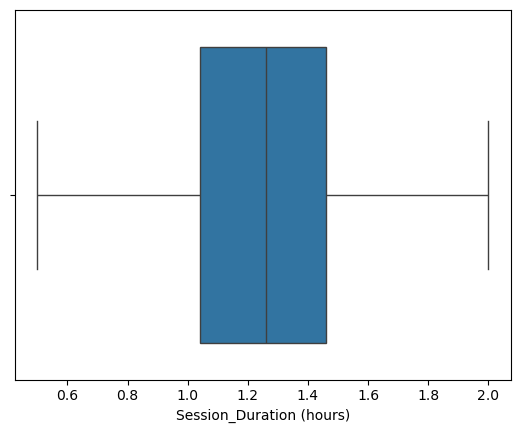

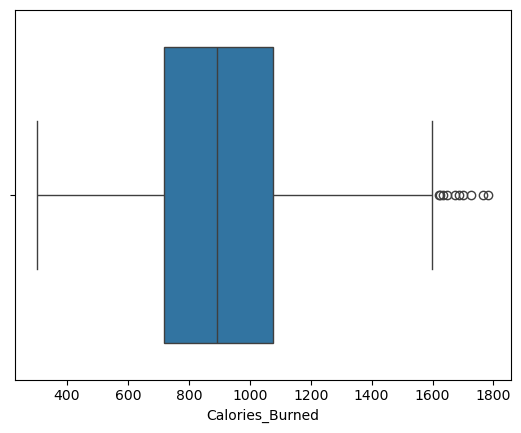

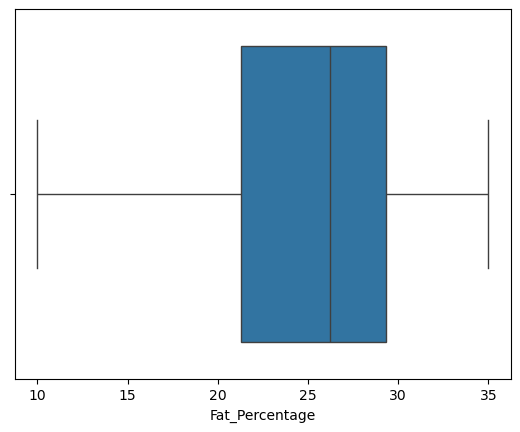

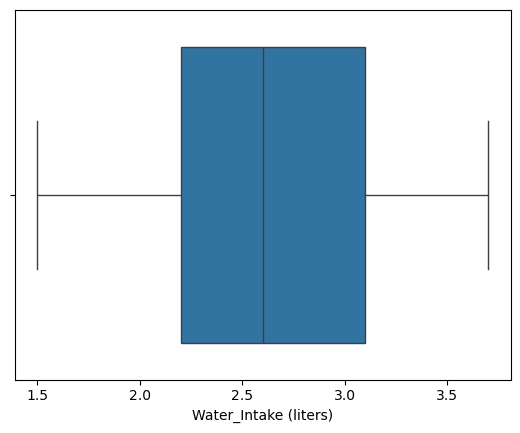

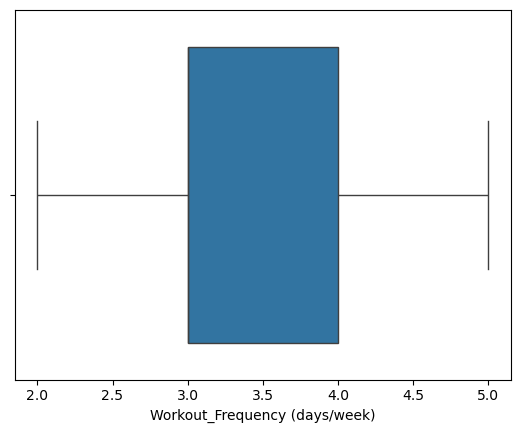

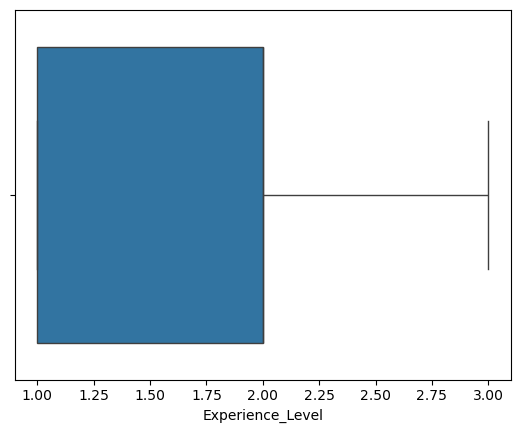

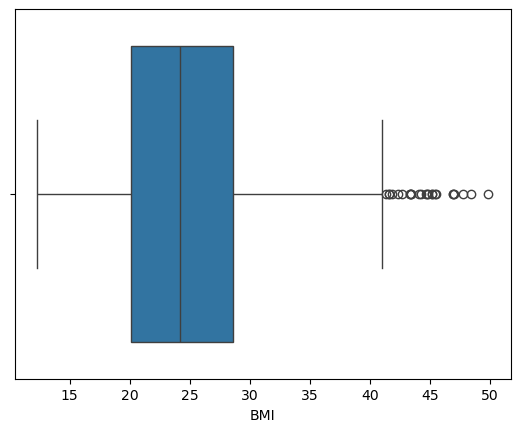

In [115]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

# Feature Engineering

- Encode categorical variable

In [5]:
data = df.select_dtypes(include="object").columns

Index(['Gender', 'Workout_Type'], dtype='object')

In [6]:
encoded_df = pd.get_dummies(df, columns=['Gender'], drop_first=False)

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male
0,56,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,True,False
2,32,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,True,False
3,25,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,False,True
4,38,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77,False,True
969,25,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69,False,True
970,59,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50,True,False
971,32,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74,False,True


In [7]:
new_encoded_df = pd.get_dummies(encoded_df, columns=['Workout_Type'], drop_first=False)
data=new_encoded_df.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,False,True,False,False,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,True,False,False,True,False,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,True,False,True,False,False,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,False,True,False,False,True,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,False,True,False,False,True,False


- Scale or normalize numerical features

In [8]:
data = new_encoded_df

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,False,True,False,False,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,True,False,False,True,False,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,True,False,True,False,False,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,False,True,False,False,True,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,False,True,False,False,True,False
969,25,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,False,True,False,False,True,False
970,59,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,True,False,True,False,False,False
971,32,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,False,True,False,True,False,False


In [23]:
data = df.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Gender_Female', 'Gender_Male',
       'Workout_Type_Cardio', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga'],
      dtype='object')

In [24]:
df=new_encoded_df
numericals = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'Gender_Female', 'Gender_Male',
       'Workout_Type_Cardio', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga']
scaler = MinMaxScaler()
df[numericals] = scaler.fit_transform(df[numericals])
joblib.dump(scaler, 'scaler.pkl')
data = df

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,0.926829,0.537264,0.42,0.512821,0.755102,0.416667,0.793333,0.682432,0.104,0.909091,0.666667,1.0,30.20,0.0,1.0,0.0,0.0,0.0,1.0
1,0.682927,0.388209,0.06,0.487179,0.632653,0.666667,0.533333,0.391892,0.956,0.272727,0.666667,0.5,32.00,1.0,0.0,0.0,1.0,0.0,0.0
2,0.341463,0.312570,0.32,0.179487,0.040816,0.166667,0.406667,0.252703,0.936,0.363636,0.666667,0.5,24.71,1.0,0.0,1.0,0.0,0.0,0.0
3,0.170732,0.146830,0.40,0.769231,0.897959,0.250000,0.060000,0.154730,0.752,0.272727,0.333333,0.0,18.41,0.0,1.0,0.0,0.0,1.0,0.0
4,0.487805,0.067853,0.58,0.717949,0.775510,0.750000,0.093333,0.170946,0.768,0.590909,0.333333,0.0,14.39,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.146341,0.523915,0.48,0.692308,0.775510,0.708333,0.713333,0.716892,0.000,0.909091,0.666667,1.0,28.77,0.0,1.0,0.0,0.0,1.0,0.0
969,0.170732,0.295884,0.22,0.615385,0.938776,0.250000,0.586667,0.646622,0.600,0.681818,0.000000,0.0,25.69,0.0,1.0,0.0,0.0,1.0,0.0
970,1.000000,0.226919,0.52,0.871795,0.000000,0.125000,0.813333,0.422973,0.352,0.545455,1.000000,1.0,19.50,1.0,0.0,1.0,0.0,0.0,0.0
971,0.341463,0.961068,0.66,0.974359,0.530612,0.500000,0.400000,0.391892,0.728,0.272727,0.333333,0.5,37.74,0.0,1.0,0.0,1.0,0.0,0.0


# Data Splitting

In [25]:
x= df.drop('BMI',axis=1)
y=df['BMI']
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"Train size: {X_train.shape[0]}, Validation size: {X_val.shape[0]}, Test size: {X_test.shape[0]}")

Train size: 681, Validation size: 146, Test size: 146


# Model Development and Training

In [26]:
#select a model and initialize
model = LinearRegression()

In [27]:
#train the model on training set
model.fit(X_train,y_train)

LinearRegression()

# Model Evaluation and hyperparameter tunning

In [28]:
#validate the model on validation set
y_val_pred = model.predict(X_val)
#evaluate performance on validation set
val_mae = mean_absolute_error(y_val,y_val_pred)
val_mse = mean_squared_error(y_val,y_val_pred)
var_r2_score = r2_score(y_val,y_val_pred)
print(f"Validation on mean absoulte error: {val_mae:.2f}")
print(f"Validation on mean squared error: {val_mse:.2f}")
print(f"Validation on r2 score: {var_r2_score:.2f}")

Validation on mean absoulte error: 0.64
Validation on mean squared error: 0.75
Validation on r2 score: 0.98


- check for overfitting and underfitting

In [29]:
# Predict on the training set
y_train_pred = model.predict(X_train)

# Evaluate on the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Validation Performance:")
print(f"Validation mean absoulte error: {val_mae:.2f}")
print(f"Validation mean squared error: {val_mse:.2f}")
print(f"Validation r2 score: {var_r2_score:.2f}")

print(f"Training Performance:")
print(f"Train mean absoulte error: {train_mae:.2f}")
print(f"Train mean squared error: {train_mse:.2f}")
print(f"Train r2 score: {train_r2:.2f}")

Validation Performance:
Validation mean absoulte error: 0.64
Validation mean squared error: 0.75
Validation r2 score: 0.98
Training Performance:
Train mean absoulte error: 0.58
Train mean squared error: 0.63
Train r2 score: 0.98


# Model testing and deployment

In [30]:
y_test_pred = model.predict(X_test)
# evaluate performance on test set
test_mae = mean_absolute_error(y_test,y_test_pred)
test_mse = mean_squared_error(y_test,y_test_pred)
test_r2 = r2_score(y_test,y_test_pred)

print(f"Testing Performance:")
print(f"Test mean absoulte error: {test_mae:.2f}")
print(f"Test mean squared error: {test_mse:.2f}")
print(f"Test r2 score: {test_r2:.2f}")

Testing Performance:
Test mean absoulte error: 0.59
Test mean squared error: 0.73
Test r2 score: 0.99


In [21]:
joblib.dump(model, 'bmi_predicting_model.pkl')
print("Model saved as 'bmi_predicting_model.pkl'")

Model saved as 'bmi_predicting_model.pkl'


In [22]:
df.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Gender_Female', 'Gender_Male',
       'Workout_Type_Cardio', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga'],
      dtype='object')

In [35]:
warnings.filterwarnings('ignore',category=FutureWarning)
model = joblib.load('bmi_predicting_model.pkl')
st.title('BMI Prediction App')
st.header('Enter Features for BMI Prediction')
age = st.number_input('Age',value=0.0)
weight = st.number_input('Weight(Kg)',value=0.0)
height = st.number_input('Height(cm)',value=0.0)
Max_BPM = st.number_input('Maximum BPM',value=0.0)
Avg_BPM = st.number_input('Avg BPM',value=0.0)
Resting_BPM = st.number_input('Resting BPM',value=0.0)
Session_Duration = st.number_input('Workout Session duration',value=0.0)
Calories_Burned = st.number_input('Calories Burned',value=0.0)
Fat_Percentage = st.number_input('Fat Percentage',value=0.0)
Water_Intake = st.number_input('Water intake(liters)',value=0.0)
Workout_Frequency = st.number_input('Workout Frequency(days/week)',value=0.0)
Experience_Level = st.number_input('Experience Level',value=0.0)

gender = st.selectbox('Gender',['Female','Male'])
gender_encoded = {
    'Gender_Female': 0 ,
    'Gender_Male': 0
}
gender_encoded[f'Gender_{gender}'] = 1

workout_type = st.selectbox('Workout Type',['Cardio','HIIT','Strength','Yoga'])
workout_encoded = {
    'Workout_Type_Cardio': 0,
    'Workout_Type_HIIT': 0,
    'Workout_Type_Strength': 0,
    'Workout_Type_Yoga': 0
}
workout_encoded[f'Workout_Type_{workout_type}'] = 1

if st.button('Predict BMI'):
    input_data = pd.DataFrame({
        'Age':[age],
        'Weight (kg)':[weight],
        'Height (m)':[height],
        'Max_BPM':[Max_BPM],
        'Avg_BPM': [Avg_BPM],
        'Resting_BPM': [Resting_BPM],
        'Session_Duration (hours)': [Session_Duration],
        'Calories_Burned': [Calories_Burned],
        'Fat_Percentage': [Fat_Percentage],
        'Water_Intake (liters)': [Water_Intake],
        'Workout_Frequency (days/week)':[ Workout_Frequency],
        'Experience_Level': [Experience_Level],
        **gender_encoded,
        **workout_encoded
    })
    input_data_scaled = scaler.fit_transform(input_data)
    prediction = model.predict(input_data_scaled)
    if isinstance(prediction, (list, np.ndarray)):
        prediction_value = prediction[0] 
    else:
        prediction_value = prediction 
    prediction = max(prediction_value, 0) 
    st.success(f'Predicted BMI: {prediction_value:.2f}')

2024-12-02 22:02:19.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 22:02:20.000 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 22:02:20.003 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 22:02:20.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 22:02:20.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 22:02:20.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 22:02:20.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 22:02:20.009 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar